In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [10]:
df=pd.read_csv('titanic_toy.csv')

In [11]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [13]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [17]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [20]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

# 1. Pandas fillna() function for imputation:

In [25]:
# finding median and mean of each column
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [26]:
# making a new column for each 
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_age)

In [24]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
188,40.0,15.500,2,40.00,40.000000,15.500,15.500000
16,2.0,29.125,5,2.00,2.000000,29.125,29.125000
235,NaN,7.550,0,28.75,29.785904,7.550,7.550000
649,23.0,NaN,0,23.00,23.000000,28.750,29.785904
719,33.0,7.775,0,33.00,33.000000,7.775,7.775000


In [27]:
print('Original Age variable variance:', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance: 204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2324.957613614932
Fare Variance after mean imputation:  2324.623996772902


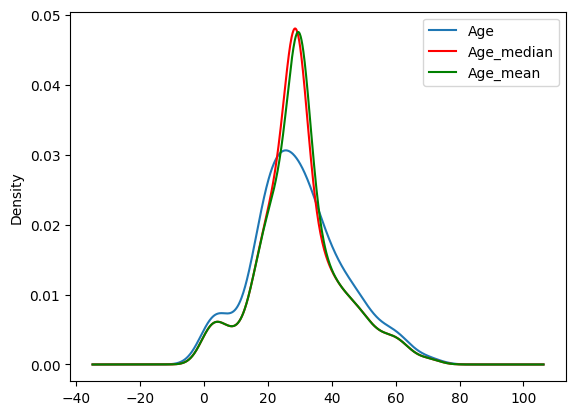

In [30]:
# data distribution changes on adding data to these values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

the distribution changes by adding mean, median as missing values(not good for the model)

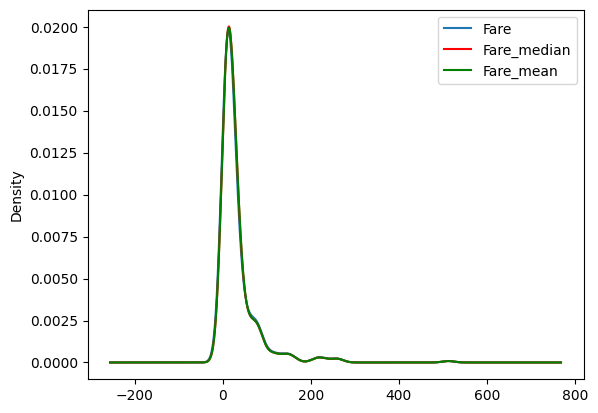

In [33]:
fig= plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

single curve as all three curves overlap, distribution almost remains same

In [34]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
Fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
Fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [35]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
Fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
Fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<Axes: >

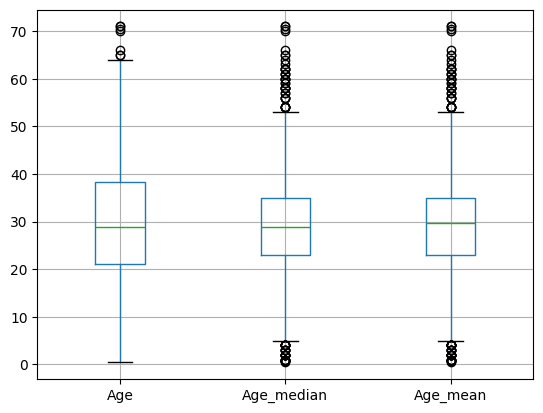

In [36]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

outliers are added by mean/median imputation

# 2.Imputation using sklearn Simple Imputer() class:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

above link is scikit learn simple imputer documentation

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
imputer1= SimpleImputer(strategy='median')
imputer2= SimpleImputer(strategy='mean')

In [42]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [43]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [44]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [45]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [46]:
X_train=trf.fit_transform(X_train)
X_test=trf.transform(X_test)

In [47]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))